## Car sale dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()
cars = pd.read_csv('Real-life example.csv')

In [2]:
# First,check out the dataset
cars.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [3]:
"""
From the above dataset:
1. Price and EngineV contains null, so we will have to check the number of nulls and treat them
2. Registration column has 3947 columns saying yes out of a total of 4345, so the column might not really be useful
3. Model column has about 312 unique entries which will be hard to encode (dummy var)
4. The price obviously has some outliers in the upper percentile as diff btw the 75percentile and max is about 278,300
5. The mileage also has some outliers in the upper percentile as the diff btw the 75percentile and max is about 750
6. The engineV column has the same problem.
7. The year column has the same problem on the low end or lower quantile
"""
# Before solving the problems,lets check to see if the variable types is correct
cars.dtypes
# Everything seems to be in order

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [4]:
"""
Solving problem 1 (Null Values)
1. Check the total number of null values.If its less than 5% of the dataset, we drop them"""
cars.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
"""
Null Value in Price = 172,
Null Value in EngineV = 150
Total = 322 which is less than 5% of the total dataset"""
data1 = cars.dropna(axis = 0)

In [6]:
data1.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
"""
Solving problem 2(Registration column):
We can either remove the column or dummy wach response as a dummy variable which will take time"""

'\nSolving problem 2(Registration column):\nWe can either remove the column or dummy wach response as a dummy variable which will take time'

In [8]:
"""
Solvng problem 3(Model column):
We can either remove the column or dummy wach response as a dummy variable which will take time"""
modelList = cars.Model.unique()
carDict = {}
for i in range(312):
    carDict[modelList[i]]= i
data1['Model']= data1['Model'].map(carDict)

C:\Users\dare\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


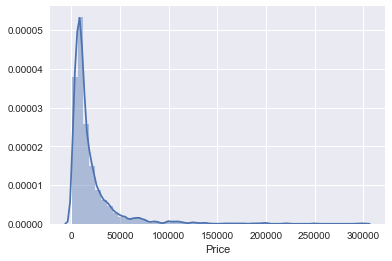

In [9]:
"""
Solving problem 4 (price outliers):
Check the distribution plot to confirm
Remove the outliers"""
sns.distplot(data1['Price'])

In [10]:
# store the upper 98th percentile in a variable and remove any column greater than that
upperQ = data1['Price'].quantile(0.99)
data2 = data1[data1.Price < upperQ]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


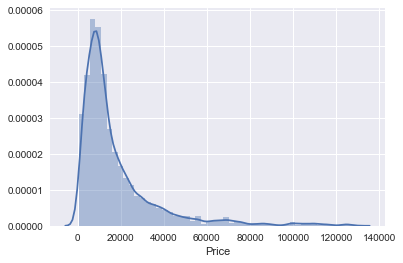

In [11]:
sns.distplot(data2.Price)

In [12]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,63.853163
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,60.782811
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,25.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,41.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,89.000000


C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


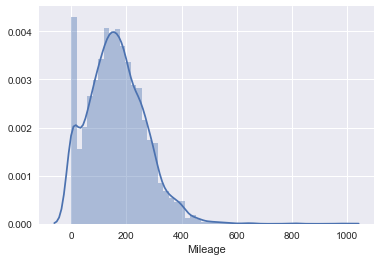

In [13]:
"""
Solve problem 5(mileage):
"""
sns.distplot(data2.Mileage)

In [14]:
upperQ2 = data2.Mileage.quantile(0.99)

In [15]:
data3 = data2[data2.Mileage < upperQ2]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


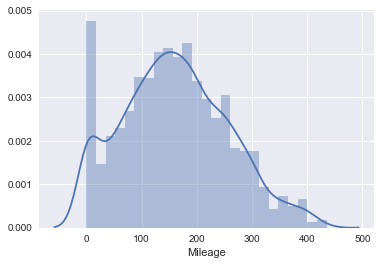

In [16]:
sns.distplot(data3.Mileage)

In [17]:
"""
Solving problem6 (EngineV):
Car engine volume is usually below 6.5"""
data4 = data3[data3.EngineV < 6.5]

C:\Users\dare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dare\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


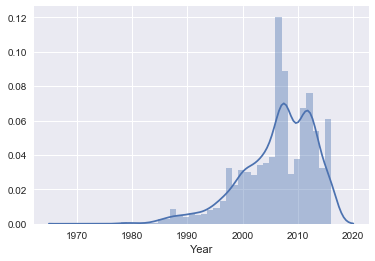

In [18]:
sns.distplot(data4.Year)

In [19]:
lowQ = data4.Year.quantile(0.01)

In [20]:
data5 = data4[data4.Year>lowQ]

In [21]:
data5.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,62.589863
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,59.691134
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,0.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,23.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,40.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,86.000000


In [22]:
# Calculate the number and percentage of data lost
print(len(cars)- len(data5))
print((len(cars)- len(data5))/len(data5))

478
0.12361003361779158


In [23]:
# Lets store our clean data intoa new var and reset the index
cleanData = data5.reset_index(drop=True)

In [24]:
cleanData

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,0
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,1
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,2
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,3
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,4
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,6
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,7
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,8
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,7
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,9


In [25]:
"""
Next, we want to check our data against the assumptions of Linear regression and see if its true/ok to use the model

1. Linearity
2. No endogeneity
3. No multicollinearity
4. Normality and Homoscedasticity
5. No autocorrelation
"""


'\nNext, we want to check our data against the assumptions of Linear regression and see if its true/ok to use the model\n\n1. Linearity\n2. No endogeneity\n3. No multicollinearity\n4. Normality and Homoscedasticity\n5. No autocorrelation\n'

In [26]:
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


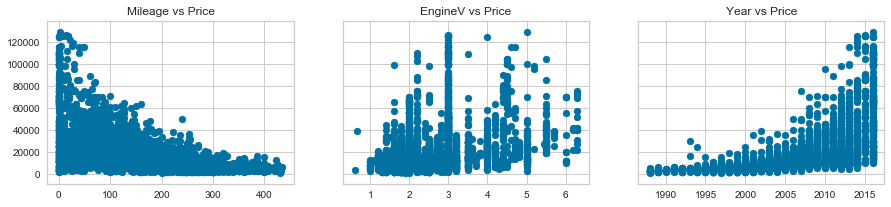

In [27]:
"""Linearity:
This will be done only to numeric data"""
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(cleanData['Mileage'], cleanData['Price'])
ax1.set_title('Mileage vs Price')
ax2.scatter(cleanData['EngineV'], cleanData['Price'])
ax2.set_title('EngineV vs Price')
ax3.scatter(cleanData['Year'], cleanData['Price'])
ax3.set_title('Year vs Price')

plt.show()

In [28]:
"""
Lets transform our price data into log"""
logPrice = np.log(cleanData.Price)
cleanData['logPrice'] = logPrice

In [29]:
cleanData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,0,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,1,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,2,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,3,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,4,9.814656


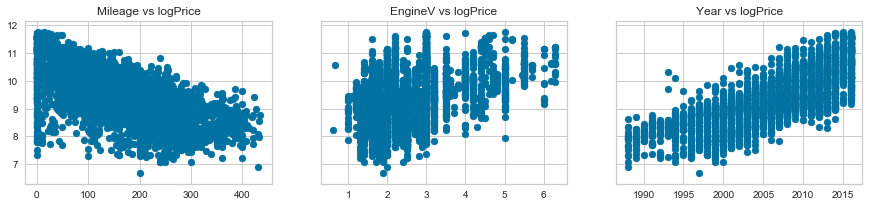

In [30]:
'Lets verify its been appropriately taken care of'
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(cleanData['Mileage'], cleanData['logPrice'])
ax1.set_title('Mileage vs logPrice')
ax2.scatter(cleanData['EngineV'], cleanData['logPrice'])
ax2.set_title('EngineV vs logPrice')
ax3.scatter(cleanData['Year'], cleanData['logPrice'])
ax3.set_title('Year vs logPrice')

plt.show()

In [31]:
# Lets drop the Price variable then
cleanData = cleanData.drop('Price',axis = 1)

In [32]:
"""
2. No endogeneity: No important variable is left out and no X nd Y variable causes each other."""

'\n2. No endogeneity: No important variable is left out and no X nd Y variable causes each other.'

In [33]:
"""
Multicollinearity.
To see if theres no mulitcollinearity between independent variables...
1. Plot the pair plots
2. Plot the heatmap (correlation matrix)
3. Finally use the VIF.
Make decision on which to drop or if theres need to drop anything
"""

'\nMulticollinearity.\nTo see if theres no mulitcollinearity between independent variables...\n1. Plot the pair plots\n2. Plot the heatmap (correlation matrix)\n3. Finally use the VIF.\nMake decision on which to drop or if theres need to drop anything\n'

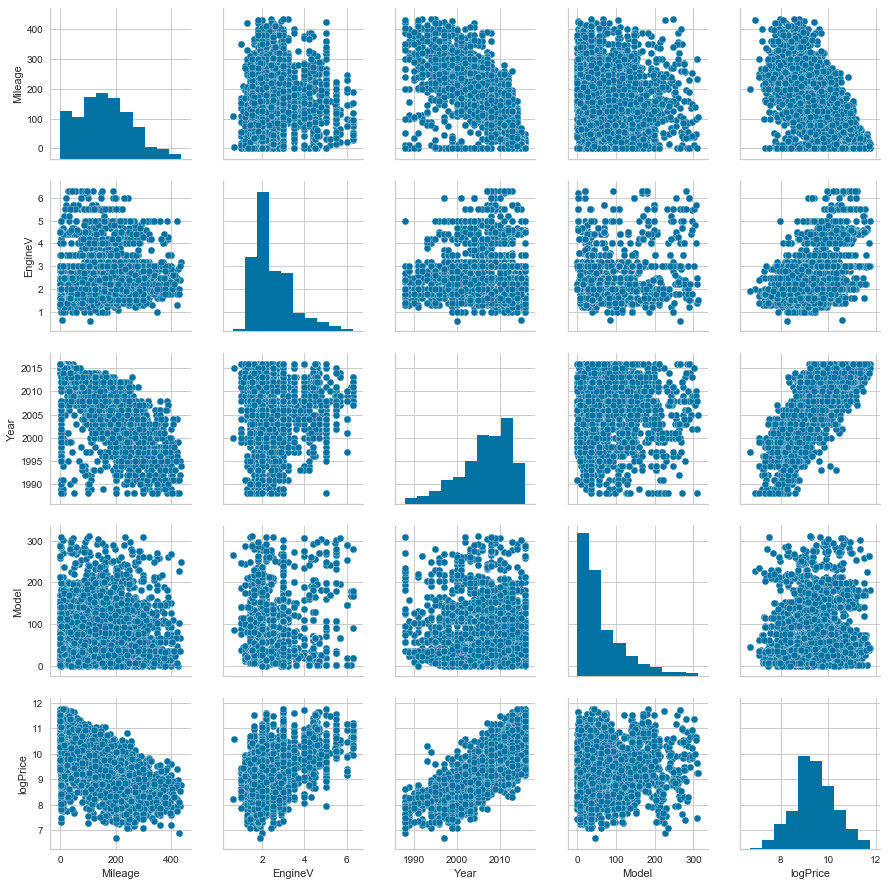

In [34]:
# Pairplots
sns.pairplot(cleanData)

In [35]:
cleanData.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,0,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,1,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,2,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,3,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,4,9.814656


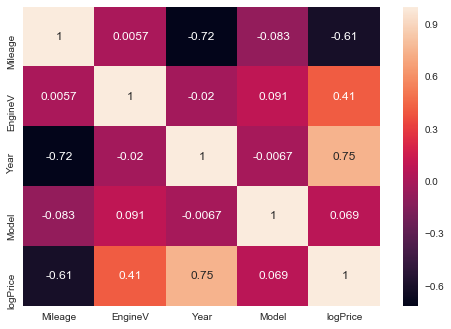

In [36]:
# Heatmap correlation coefficient
sns.heatmap(cleanData.corr(),annot = True)

In [37]:
"""
From the above plots,it shows that 2 of the independent variables (year and Mileage) are highly correlated. With a correlation of .72
This actually makes a lot of sense as mileage of a car increases with year..
Question now is, which variable will be dropped.

Lets use the Variance Inflation Factor(VIF) from statsmodel on EngineV, year and mileage
"""
testVIF = cleanData[['EngineV','Year','Mileage']]
Vif = pd.DataFrame()
Vif['VIF'] = [variance_inflation_factor(testVIF.values, i) for i in range(testVIF.shape[1])]
Vif['Features']= testVIF.columns

In [38]:
Vif

,VIF,Features
0,7.662068,EngineV
1,10.354854,Year
2,3.791584,Mileage


In [39]:
"""
The table above shows the VIF of Year and EngineV is high but year is higher.. Invariably,dropping the yearcolumn should lower the Vif of EngineV
"""
cleanData = cleanData.drop('Year', axis = 1)

In [40]:
cleanData.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,0,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,3,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,4,9.814656


In [41]:
# Lets see if the VIF has reduced
testVIF2 = cleanData[['EngineV','Mileage']]
Vif2 = pd.DataFrame()
Vif2['VIF'] = [variance_inflation_factor(testVIF2.values, i) for i in range(testVIF2.shape[1])]
Vif2['Features']= testVIF2.columns

In [42]:
Vif2

,VIF,Features
0,2.805214,EngineV
1,2.805214,Mileage


In [43]:
cols = ['logPrice','Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Model']
cleanData = cleanData[cols]

In [44]:
"""
Next,we sort the dummy variables using pandas get_dummy function.
Variables to sort:
Brand, Body, Engine Type
"""
dummyData = pd.get_dummies(cleanData, drop_first = True)

In [45]:
dummyData

,logPrice,Mileage,EngineV,Model,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.90,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.00,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.20,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.00,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,9.560997,200,2.70,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,9.287209,193,1.50,7,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,7.244228,212,1.80,8,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,9.388487,177,1.50,7,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,7.824046,260,1.79,9,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [46]:
dums = dummyData.copy()
dumtest = dums.drop('logPrice', axis = 1)

In [47]:
firstvif = pd.DataFrame()
firstvif['vif']= [variance_inflation_factor(dumtest.values,i) for i in range(dumtest.shape[1])]
firstvif['variable'] = dumtest.columns

In [48]:
"""
Next, we transform or standardize the input variables
"""
dummyData.head()

,logPrice,Mileage,EngineV,Model,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [49]:
y_var = dummyData.logPrice
x_var = dummyData.drop('logPrice', axis = 1)

In [50]:
# Normalise the x_var
scaler = StandardScaler()
scaler.fit(x_var)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
x_transform = scaler.transform(x_var)

In [52]:
x_transform

array([[ 1.2179077 , -0.47452478, -1.04869775, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -1.03194267, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -1.0151876 , ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.32822959, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  1.29701253, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478,  0.44250378, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [53]:
"""
Now its time to run our regression analysis. First we split the dataset into train and test
"""
x_train,x_test,y_train, y_test = train_test_split(x_transform,y_var, test_size = 0.2)

In [54]:
# Fit the regression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)